In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from data import *

In [164]:
raw_segmented_data, segmented_dataframes = load_data()
raw_filtered_data, filtered_dataframes = load_data(subfolder='Filtered_Data')

NameError: name 'SFREQ' is not defined

Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


/var/folders/7s/5h000n6s2z75cbf4y33k39y40000gn/T/ipykernel_53861/3337074138.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  first_subject_first_experiment_first_session_raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
/Users/syntactic/miniconda3/envs/dna/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


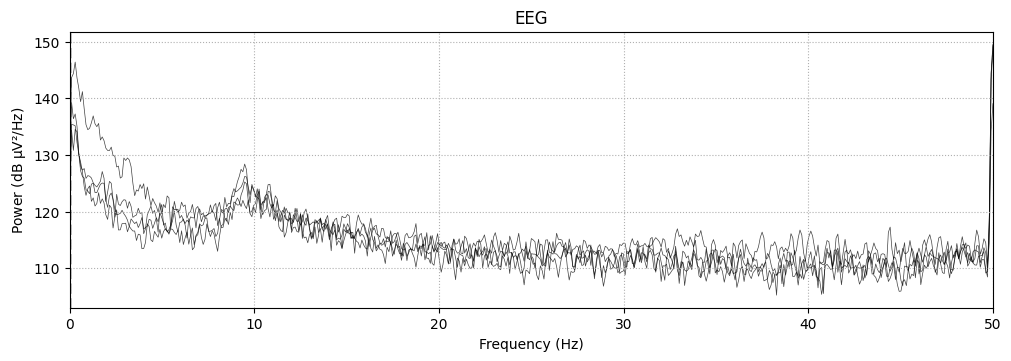

In [162]:
first_subject_first_experiment_first_session_df = d_a_df[1][1][0]
first_subject_first_experiment_first_session_raw = d[1][1][0]
first_subject_first_experiment_first_session_raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)

In [19]:
print(first_df.iloc[0]["T7"])
print((first_df.iloc[0]["T7"] - first_channel_mean)/first_channel_std)
print((first_df.iloc[0]["T7"] - channel_means["T7"])/channel_stds["T7"])
print((first_df.iloc[0]["F8"] - channel_means["F8"])/channel_stds["F8"])

533.9567260742189
0.43269783835528647
0.43269783835528647
-0.21745018765863267


In [20]:
from scipy.signal import butter, lfilter, iirnotch

# Butterworth bandpass filter: 1-40 Hz
def butter_bandpass(lowcut, highcut, fs, order=1):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=1):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return lfilter(b, a, data)

# Notch filter for 50 Hz
def apply_notch_filter(data, notch_freq, quality_factor, fs):
    b, a = iirnotch(notch_freq, quality_factor, fs)
    return lfilter(b, a, data)

# Apply both filters
fs = 1000  # Example sampling frequency
lowcut = 1.0  # Low frequency cutoff
highcut = 40.0  # High frequency cutoff
notch_freq = 50  # Notch frequency (50 Hz)
quality_factor = 30  # Quality factor for notch filter
test_row = first_df.iloc[0]
filtered_data = bandpass_filter(first_df, lowcut, highcut, fs)
filtered_data = apply_notch_filter(filtered_data, notch_freq, quality_factor, fs)

In [21]:
print(filtered_data)

[[ 58.23711163  -7.95732345 -69.89517172  31.18704743]
 [ 56.35057832 -13.14518167 -77.13694601  23.57835893]
 [ 56.89104095 -11.89070833 -74.6432705   26.27697486]
 ...
 [ 56.55452661 -11.13844288 -74.4708529   24.0072656 ]
 [ 59.38698269  -3.59770627 -64.16524864  34.53271077]
 [ 57.85817269  -8.16484985 -70.32569916  29.67635376]]


In [24]:
from sklearn.preprocessing import StandardScaler

# Normalize the filtered data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data).flatten()

In [25]:
print(scaled_data)

[0.43270685 0.17011754 0.1630694  ... 0.1137163  0.08459511 0.20590904]


In [156]:
import scipy.signal as signal
lowcut = 1  # Low cutoff frequency (Hz)
highcut = 40  # High cutoff frequency (Hz)
order = 1  # Filter order
sampling_rate = 200
first_raw_data = d[1][1][0]
first_raw_filtered = first_raw_data.copy()

eeg_data, times = first_raw_data['T7']  # Extracting the T7 channel data
eeg_data = eeg_data[0]
print(eeg_data[:5])
filtered_eeg = eeg_data.copy()
# Butterworth filter design
b, a = signal.butter(order, [lowcut / (0.5 * sampling_rate), highcut / (0.5 * sampling_rate)], btype='band')
# Apply the Butterworth filter
filtered_eeg = signal.filtfilt(b, a, filtered_eeg)  # Apply filter to T7 channel
print(filtered_eeg[:5])
b, a = iirnotch(50 / (0.5 * sampling_rate), 30, 200)
filtered_eeg = signal.filtfilt(b, a, filtered_eeg)
print(filtered_eeg[:5])

[533.95672607 516.659729   521.61505127 548.44134521 537.38623047]
[ -6.487254   -15.1527503  -11.62513419  -3.00032271  -4.77595083]
[ -6.39643293 -15.06263271 -11.53574567  -2.91168823  -4.68809386]


In [157]:
import numpy as np
print(filtered_eeg)
mean_filtered_eeg = np.mean(filtered_eeg)
std_filtered_eeg = np.std(filtered_eeg)
centered_data = (filtered_eeg - mean_filtered_eeg) / std_filtered_eeg
#centered_data = filtered_eeg - mean_filtered_eeg
print(centered_data[:5])

[ -6.39643293 -15.06263271 -11.53574567 ...  -0.27572193   7.91861378
   6.37919821]
[-1.17267991 -2.76430133 -2.11655848 -0.53267686 -0.85892889]


In [86]:
import pandas as pd
filtered_df = pd.read_csv("auditory-evoked-potential-eeg-biometric-dataset-1.0.0/Filtered_Data/s01_ex01_s01.csv")
filtered_df["T7"].iloc[0]

np.float64(0.3816847974272952)

In [55]:
segmented_df = pd.read_csv("auditory-evoked-potential-eeg-biometric-dataset-1.0.0/Segmented_Data/s01_ex01_s01.csv")
segmented_df.mean()

Unnamed: 0    20999.500000
T7              528.354573
F8            -1013.569320
Cz              426.190856
P4              335.232767
dtype: float64